In [1]:
!pip install pyforest

In [2]:
data1=pd.read_csv('A:\\Roposo\\intern\\data.csv')
data1

<IPython.core.display.Javascript object>

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [3]:
data1.shape

(2227, 3)

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [5]:
data1.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [6]:
data=data1.isna().sum()

In [7]:
data

x1    5
x2    3
y     0
dtype: int64

In [8]:
from sklearn import preprocessing

In [9]:
label_encoder=preprocessing.LabelEncoder()

In [10]:
data1['x1']=label_encoder.fit_transform(data1['x1'])
data1['x1'].value_counts() 

75      8
1169    6
1730    5
223     5
338     5
       ..
583     1
585     1
587     1
589     1
0       1
Name: x1, Length: 1892, dtype: int64

In [11]:
data1.isna().sum()

x1    0
x2    3
y     0
dtype: int64

In [12]:
data1['x2']=label_encoder.fit_transform(data1['x2'])
data1['x2'].value_counts() 

668     7
198     7
129     6
1802    6
1174    6
       ..
575     1
577     1
579     1
581     1
0       1
Name: x2, Length: 1887, dtype: int64

In [13]:
data1.isna().sum()

x1    0
x2    0
y     0
dtype: int64

In [14]:
data1

,x1,x2,y
0,70,1802,1
1,208,1678,1
2,22,1745,1
3,101,1703,1
4,70,1802,1
...,...,...,...
2222,1704,1612,0
2223,1689,1624,0
2224,1608,1726,0
2225,1563,1533,0


In [15]:
data1.value_counts()

x1    x2    y
75    1747  1    3
70    1802  1    2
1696  1718  0    2
1240  1137  0    2
1607  95    1    2
                ..
1263  1507  0    1
1264  1117  0    1
1265  578   1    1
1266  1043  0    1
0     20    0    1
Length: 2211, dtype: int64

#    #Data Visualization

<AxesSubplot:xlabel='x1,x2,y'>

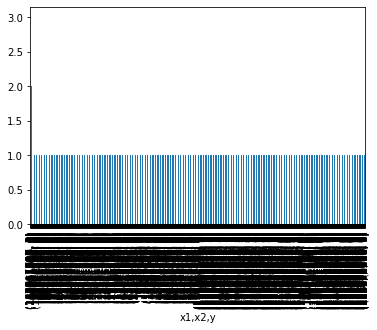

In [16]:
data1.value_counts().plot.bar()

In [17]:
data1.groupby(['x1'])['x2'].value_counts()

x1    x2  
0     20      1
1     1615    1
2     254     1
3     1761    1
4     1560    1
             ..
1887  1810    1
1888  174     1
1889  1172    1
1890  1323    1
1891  1185    1
Name: x2, Length: 2211, dtype: int64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

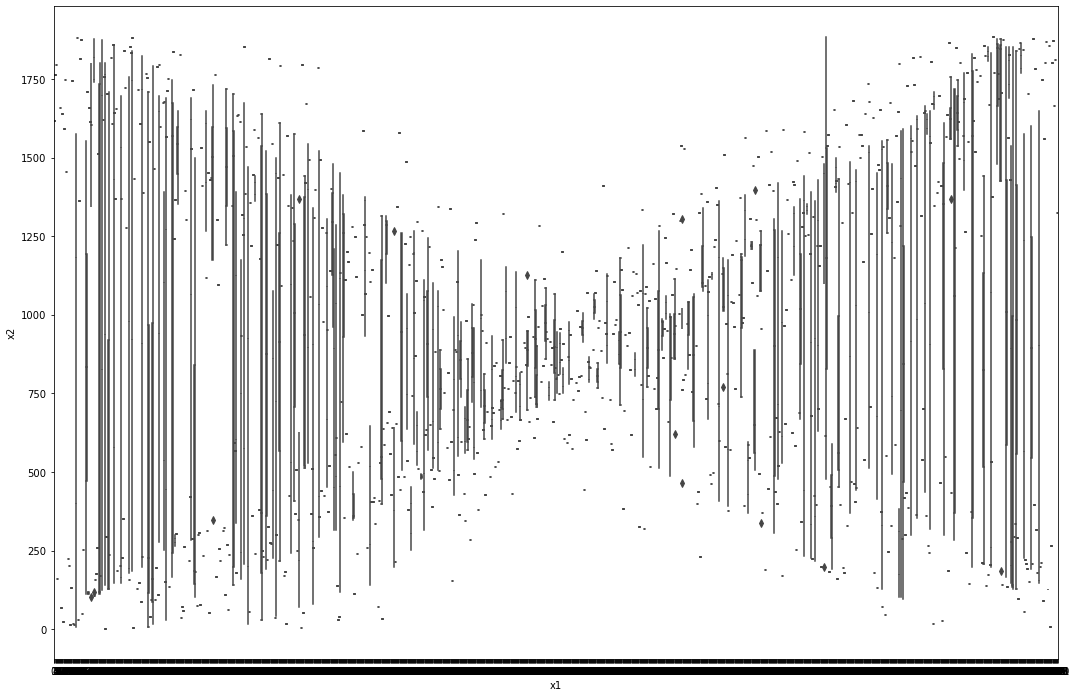

In [19]:
plt.figure(figsize=(18,12))
ax = sns.boxplot(x="x1", y="x2", data=data1)

In [20]:
data1.corr()

,x1,x2,y
x1,1.000000,0.106196,-0.122999
x2,0.106196,1.000000,0.062552
y,-0.122999,0.062552,1.000000


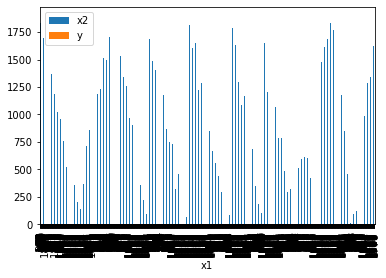

In [21]:
data1.plot(x='x1',y=['x2','y'],kind='bar')
plt.show()

<AxesSubplot:>

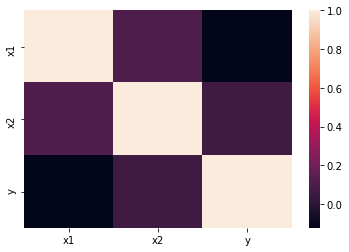

In [22]:
sns.heatmap(data1.corr())

In [23]:
data1

,x1,x2,y
0,70,1802,1
1,208,1678,1
2,22,1745,1
3,101,1703,1
4,70,1802,1
...,...,...,...
2222,1704,1612,0
2223,1689,1624,0
2224,1608,1726,0
2225,1563,1533,0


# Modeling

In [24]:
x=data1.drop('x1',axis=1).values
y=data1['x1'].values

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state = 40)

In [26]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)

C:\Users\HARISH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred = LR.predict(X_test)

In [28]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.002242152466367713

In [ ]:
#KNN

In [29]:
target = data1.y
data = data1.loc[:,['x1', 'x2']]

In [30]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data1)
print(standardized_data.shape)

(2227, 3)


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardized_data, \
                                                   target, \
                                                   test_size = 0.25, \
                                                   random_state = 0)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
y_pred = classifier.predict(X_test)

In [34]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

1.0

# Logistic Regression

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardized_data, 
                                                   target, 
                                                   test_size = 0.25, 
                                                   random_state = 0)

In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = classifier.predict(X_test)

In [38]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

1.0

# Decision Tree

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, \
                                                   y, \
                                                   test_size = 0.25, \
                                                   random_state = 0)

In [40]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [41]:
y_test_pred = classifier.predict(X_test)

In [42]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.0017953321364452424

# Support vector machine

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, \
                                                   y, \
                                                   test_size = 0.25, \
                                                   random_state = 0)

In [44]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [45]:
y_pred = classifier.predict(X_test)

In [46]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.003590664272890485